<a href="https://colab.research.google.com/github/lalitmendhule/Deep-Learning/blob/main/Prac2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 5, 30).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(scale=0.2, size=X.shape[0])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial degrees to try
degrees = [1, 3, 10]

plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees, 1):
    # Transform features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


<Figure size 1500x500 with 0 Axes>

In [ ]:
# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

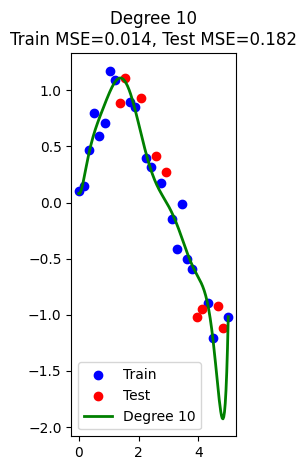

In [ ]:
# Plot
plt.subplot(1, 3, i)
plt.scatter(X_train, y_train, color="blue", label="Train")
plt.scatter(X_test, y_test, color="red", label="Test")

# Curve
X_curve = np.linspace(0, 5, 200).reshape(-1, 1)
y_curve = model.predict(poly.transform(X_curve))
plt.plot(X_curve, y_curve, color="green", linewidth=2, label=f"Degree {d}")

plt.title(f"Degree {d}\nTrain MSE={train_mse:.3f}, Test MSE={test_mse:.3f}")
plt.legend()

plt.tight_layout()
plt.show()